### companion to threshold_count to visualize our data

In [23]:
library(ggplot2)
library(plyr)
library(reshape2)

In [33]:
#### A
test_A <- read.csv('~/Dropbox/sdworkin2016/genotype_A.csv')
#test_A <- read.csv('~/Dropbox/sdworkin2016/solute_A.csv')

test_A$pref_index <- as.numeric(as.character(test_A$pref_index))
pref_A <- data.frame('genotype' = 'A', 'pref' = test_A[!is.na(test_A$pref_index),]$pref_index, 'pixels' = test_A[!is.na(test_A$pref_index),]$total_pixels)

#### B
test_B <- read.csv('~/Dropbox/sdworkin2016/genotype_B.csv')
#test_B <- read.csv('~/Dropbox/sdworkin2016/solute_B.csv')

test_B$pref_index <- as.numeric(as.character(test_B$pref_index))
pref_B <- data.frame('genotype' = 'B', 'pref' = test_B[!is.na(test_B$pref_index),]$pref_index, 'pixels' = test_B[!is.na(test_B$pref_index),]$total_pixels)

#### C
test_C <- read.csv('~/Dropbox/sdworkin2016/genotype_C.csv')
#test_C <- read.csv('~/Dropbox/sdworkin2016/solute_C.csv')

test_C$pref_index <- as.numeric(as.character(test_C$pref_index))
pref_C <- data.frame('genotype' = 'C', 'pref' = test_C[!is.na(test_C$pref_index),]$pref_index, 'pixels' = test_C[!is.na(test_C$pref_index),]$total_pixels)

#### D
test_D <- read.csv('~/Dropbox/sdworkin2016/genotype_D.csv')
test_D$pref_index <- as.numeric(as.character(test_D$pref_index))
pref_D <- data.frame('genotype' = 'D', 'pref' = test_D[!is.na(test_D$pref_index),]$pref_index, 'pixels' = test_D[!is.na(test_D$pref_index),]$total_pixels)

#### E
test_E <- read.csv('~/Dropbox/sdworkin2016/genotype_E.csv')
test_E$pref_index <- as.numeric(as.character(test_E$pref_index))
pref_E <- data.frame('genotype' = 'E', 'pref' = test_E[!is.na(test_E$pref_index),]$pref_index, 'pixels' = test_E[!is.na(test_E$pref_index),]$total_pixels)

#### F
test_F <- read.csv('~/Dropbox/sdworkin2016/genotype_F.csv')
test_F$pref_index <- as.numeric(as.character(test_F$pref_index))
pref_F <- data.frame('genotype' = 'C', 'pref' = test_F[!is.na(test_F$pref_index),]$pref_index, 'pixels' = test_F[!is.na(test_F$pref_index),]$total_pixels)

#### control
control <- read.csv('~/Dropbox/sdworkin2016/control.csv')
control$pref_index <- as.numeric(as.character(control$pref_index))
control <- data.frame('genotype' = 'lvp-scrambled', 'pref' = control[!is.na(control$pref_index),]$pref_index, 'pixels' = control[!is.na(control$pref_index),]$total_pixels)


all_preference <- rbind(pref_A,pref_B,pref_C,pref_D,pref_E,pref_F)
all_preference.filtered <- all_preference[all_preference$pixels > 150,]

all_preference <- rbind(pref_A,pref_B,pref_C,pref_D,pref_E,pref_F,control)
all_preference.filtered <- all_preference[all_preference$pixels > 150,]

preference_plot <- ggplot(data=all_preference,aes(x=genotype,y=pref)) + geom_point()
pixel_plot <- ggplot(data=all_preference,aes(x=genotype,y=pixels)) + geom_point()

preference_plot.filtered <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref)) + geom_point()
pixel_plot.filtered <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pixels)) + geom_point()



In [34]:
### testing for ANOVA
aov(pref ~ genotype,data=all_preference.filtered) -> genotype_AOV
summary(genotype_AOV)
TukeyHSD(genotype_AOV)

             Df Sum Sq Mean Sq F value Pr(>F)    
genotype      5  29.52   5.905   18.75 <2e-16 ***
Residuals   355 111.82   0.315                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = pref ~ genotype, data = all_preference.filtered)

$genotype
                       diff         lwr         upr     p adj
B-A             -0.23330567 -0.52793071  0.06131937 0.2096246
C-A             -0.39089165 -0.67131526 -0.11046804 0.0011056
D-A             -0.58428084 -0.91260900 -0.25595268 0.0000082
E-A             -0.45338806 -0.79154437 -0.11523175 0.0019943
lvp-scrambled-A  0.36030810  0.03197994  0.68863626 0.0220954
C-B             -0.15758598 -0.40230573  0.08713377 0.4381260
D-B             -0.35097517 -0.64938720 -0.05256315 0.0107219
E-B             -0.22008239 -0.52927496  0.08911018 0.3220817
lvp-scrambled-B  0.59361377  0.29520175  0.89202580 0.0000004
D-C             -0.19338919 -0.47778895  0.09101056 0.3744851
E-C             -0.06249641 -0.35818803  0.23319521 0.9905980
lvp-scrambled-C  0.75119975  0.46679999  1.03559951 0.0000000
E-D              0.13089278 -0.21056807

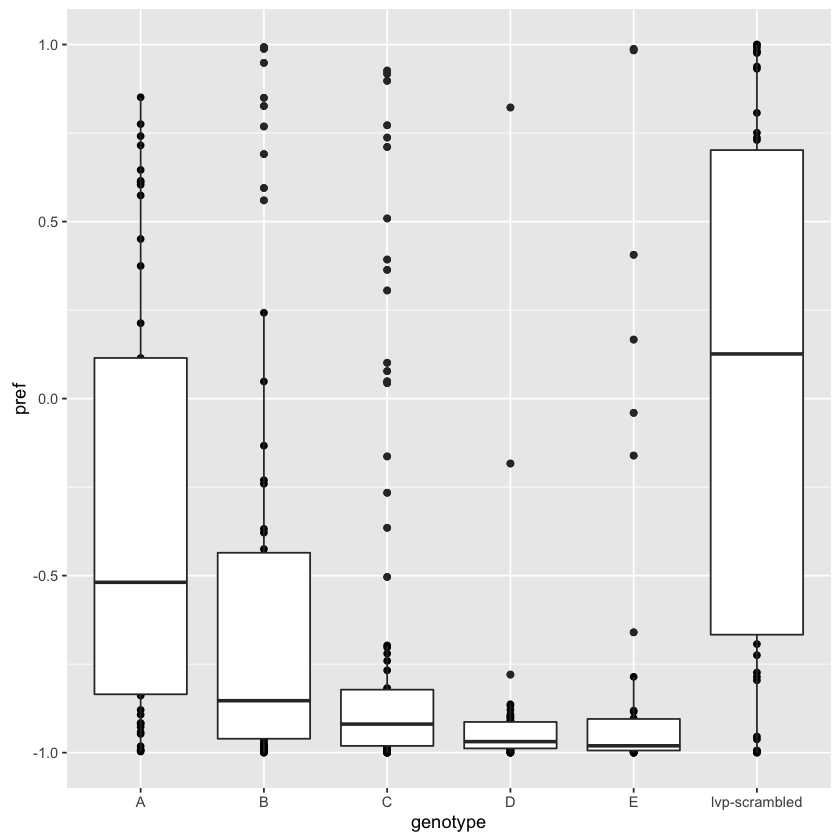

In [35]:
preference_plot.filtered + geom_boxplot()

In [17]:
test_A[test_A$total_pixels > 150,]

,egg_pixels,filename,pref_index,total_pixels
1,44,20160830-1-a1.png,-0.9161905,1050
NA,NA,NA,NA,NA
3,52,20160830-1-a3.png,-0.9183673,1274
NA.1,NA,NA,NA,NA
NA.2,NA,NA,NA,NA
6,206,20160830-1-b2.png,-0.3878158,673
NA.3,NA,NA,NA,NA
8,109,20160830-1-b4.png,-0.7183463,774
9,177,20160830-1-c1.png,0.4508197,244
NA.4,NA,NA,NA,NA
